sql_notes_for_project

OBJECTIVE
- to predict the values of single unit properties 

     also the tax district assesses using the property data 
           from those whose last transaction 
           was during the "hot months" (in terms of real estate demand) of May and June in 2017.
           
     (where these properties were located)
     property taxes are assessed at the county level
- To know what states and counties these are located in (THIS IS INVOLVES THE FIPS DATA)

- to know the distribution of tax rates for each county
      tax amounts and tax value of the home
  ** include the distribution of tax rates for each county
  **This is separate from the model you will build,
  
# other notes (for MVP)

Other notes:

- For the first iteration of your model, 
   use only 
   square feet, number of bedrooms, and number of bathrooms 
            to estimate the properties assessed value, 'taxvaluedollarcnt'. 
            
  You can expand this to other fields after you have completed an mvp (minimally viable product).
  
- You will want to read and re-read the requirements given by your stakeholders to be sure you are meeting all of their needs and representing it in your data, report and model.

- You will want to do some data validation or QA (quality assurance) to be sure the data you gather is what you think it is.

- You will want to make sure you are using the best fields to represent square feel of home, number of bedrooms and number of bathrooms. best => the most accurate and available information. You will need to do some data investigation in the database and use your domain expertise to make some judgement calls.


# Baseline

REMEMBER use only 
   square feet, number of bedrooms, and number of bathrooms 
            to estimate the properties assessed value, 'taxvaluedollarcnt'. 

# BASELINE wrangle

    NOTE on SQL at this stage:
    SELECT calculatedfinishedsquarefeet, bedroomcnt, bathroomcnt, taxvaluedollarcnt
    FROM properties_2017
    WHERE propertylandusetypeid IN (261, 262, 273, 275, 279)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
# %matplotlib inline # only for JNB, not for native python
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import wrangle_project

from scipy import stats
from math import sqrt

In [2]:
zillow_baseline = wrangle_project.wrangle_zillow_bl()


 
 
 
 
BEGINNING OF BASELINE WRANGLE OUTPUTS


In [3]:
type(zillow_baseline)

pandas.core.frame.DataFrame

In [4]:
zillow_baseline.shape
# was (15052, 4) before " > 0" removals
   # appears to have removed only 52 rows

(15000, 4)

In [5]:
zillow_baseline.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,taxvaluedollarcnt
0,1458.0,3.0,2.0,136104.0
1,1421.0,2.0,1.0,35606.0
2,2541.0,4.0,3.0,880456.0
3,1650.0,3.0,2.0,614000.0
4,693.0,2.0,1.0,274237.0


Baseline WRANGLE X and TARGET 
    aka separating X and y

In [6]:
bl_X, bl_y = wrangle_project.bl_sort_X_y(zillow_baseline)

In [7]:
bl_X.shape, type(bl_X)

((15000, 3), pandas.core.frame.DataFrame)

In [8]:
bl_y.shape, type(bl_y)

((15000, 1), pandas.core.frame.DataFrame)

ONLY DO THE asterix FOR THE BASELINE

**scale data

no - explore for any visual
no - evaluate
   Q2. Compute evaluation metrics for a baseline model
      3. Coefficient of Determination and the F-test
   Q3. Are our features valuable? The T-test for feature significance
   Q4. How much confidence do we have in our results?
       Parameters and confidence
no - Feature Engineering

**Modeling with Regression Algorithms


# BASELINE Split
- creating X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = wrangle_project.split_data(bl_X, bl_y, train_pct=.75, random_seed=42)

In [10]:
print("X_t shapes and types\n", "-" * 6 )
X_train.shape, type(X_train), X_test.shape, type(X_test)

X_t shapes and types
 ------


((11250, 3),
 pandas.core.frame.DataFrame,
 (3750, 3),
 pandas.core.frame.DataFrame)

In [11]:
print("y_t shapes and types\n", "-" * 6 )
y_train.shape, type(y_train), y_test.shape, type(y_test)

y_t shapes and types
 ------


((11250, 1),
 pandas.core.frame.DataFrame,
 (3750, 1),
 pandas.core.frame.DataFrame)

# BASELINE Scale

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
import math

In [13]:
   # call the Scaler (make obj/fit/transform/ all at once)
Xscaler, Xtrain_scaled, Xtest_scaled = wrangle_project.standard_scaler(X_train, X_test)

In [14]:
Xtrain_scaled.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt
7410,-0.328020,-0.331221,-0.321915
10894,-0.542461,-0.331221,-1.298203
1934,0.347073,-0.331221,-0.321915
11539,1.057906,-0.331221,0.654374
2952,0.981462,0.730687,0.654374


In [15]:
# check types
type(Xscaler), type(Xtrain_scaled), type(Xtest_scaled)

(sklearn.preprocessing.data.StandardScaler,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [16]:
import math

print("Mean:") 
print(Xscaler.mean_)
print("Standard Deviation:")
print([math.sqrt(i) for i in Xscaler.var_])

Mean:
[1940.40435556    3.31191111    2.32973333]
Standard Deviation:
[1007.2686155070422, 0.9417007739480312, 1.0242874683299497]


1 & 2 Create Object and Fit to Data
This takes the steps of the Fx individually

# BASELINE Model

In [17]:
# run linear regression model Fx

In [18]:
# reassessing inputs
print("X_t shapes and types\n", "-" * 6 )
X_train.shape, type(X_train), X_test.shape, type(X_test)

X_t shapes and types
 ------


((11250, 3),
 pandas.core.frame.DataFrame,
 (3750, 3),
 pandas.core.frame.DataFrame)

In [19]:
print("y_t shapes and types\n", "-" * 6 )
y_train.shape, type(y_train), y_test.shape, type(y_test)

y_t shapes and types
 ------


((11250, 1),
 pandas.core.frame.DataFrame,
 (3750, 1),
 pandas.core.frame.DataFrame)

In [20]:
  # call Fx
predictions_train,predictions_test = wrangle_project.modeling_function_lr_bl(X_train,X_test,y_train,y_test)

In [21]:
type(predictions_train),type(predictions_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [22]:
model_train,model_test=wrangle_project.modeling_function_lr_bl(X_train,X_test,y_train,y_test)

In [23]:
print(model_test.head())
print(model_train.head())

     actual            lm2
0  510433.0  440866.810735
1  403872.0  241277.494339
2  241209.0  340274.862204
3  663144.0  739585.278976
4  183883.0  163336.441130
     actual           lm1
0  573616.0  4.157153e+05
1  320000.0  2.561901e+05
2  573909.0  7.412817e+05
3  813831.0  1.140194e+06
4  923877.0  9.511667e+05


# BASELINE Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score



lm1 = LinearRegression()

print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [30]:
lm1.fit(X_train, y_train)
print("Linear Model:", lm1)

lm1_y_intercept = lm1.intercept_
print("intercept: ", lm1_y_intercept)

lm1_coefficients = lm1.coef_
print("coefficients: ", lm1_coefficients)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
intercept:  [-10846.14131993]
coefficients:  [[    478.7741327  -152161.63303668   56109.97815439]]


In [31]:
print('{} = b + m1 * {} + m2 * {}'.format(y_train.columns[0], X_train.columns[0],X_train.columns[1]))
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm1_coefficients[0][1])

taxvaluedollarcnt = b + m1 * calculatedfinishedsquarefeet + m2 * bedroomcnt
    y-intercept  (b): -10846.14
    coefficient (m1): 478.77
    coefficient (m2): -152161.63


IN-SAMPLE PREDICTION

In [32]:
y_pred_lm1 = lm1.predict(X_train)
type(y_pred_lm1)

numpy.ndarray

TRAIN/IN-SAMPLE EVALUATIONS

In [36]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("linear model\n  mean squared error: {:.3}".format(mse_lm1)) 

r2_lm1 = r2_score(y_train, y_pred_lm1)
print('  {:.2%} of the variance in tax value can be explained by square feet, and bath and bedroom counts.'.format(r2_lm1))

linear model
  mean squared error: 3.06e+11
  40.25% of the variance in tax value can be explained by square feet, and bath and bedroom counts.


Establish Baseline

In [38]:
from math import sqrt

y_pred_baseline = np.array([y_train.mean()[0]]*len(y_train))
MSE = mean_squared_error(y_train, y_pred_baseline)
SSE = MSE*len(y_train)
RMSE = sqrt(MSE)

evs = explained_variance_score(y_train, y_pred_baseline)

print('mean squared error\n model: {:.5}'.format(MSE))
print('  {:.2%} of the variance in tax value can be explained by square feet, and bath and bedroom counts.'.format(evs))

mean squared error
 model: 5.1234e+11
  0.00% of the variance in tax value can be explained by square feet, and bath and bedroom counts.


Sample vs baseline comparison

sample = mean squared error: 3.06e+11 | baseline = model: 5.7639e+15

so the model is better

# Making a pair plot for baseline/MVP
- initial features 
    calculatedfinishedsquarefeet, bedroomcnt, bathroomcnt

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

seaborn.jointplot

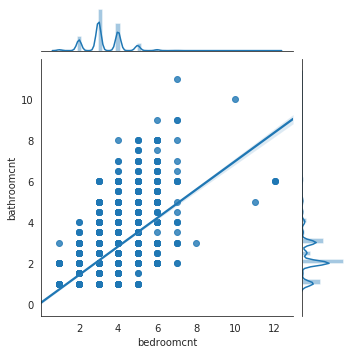

In [39]:
# calculatedfinishedsquarefeet, bedroomcnt, bathroomcnt

with sns.axes_style('white'):
    j = sns.jointplot("bedroomcnt", "bathroomcnt", data=X_train, kind='reg', height=5);
plt.show()

In [ ]:
pd.cut(X_train)

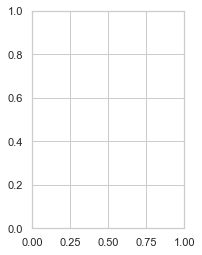

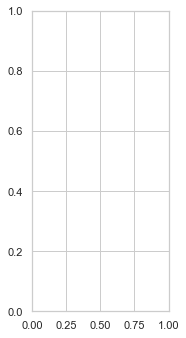

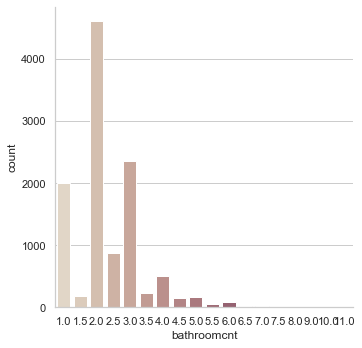

In [53]:
plt.subplot(121)
sns.catplot(x="bedroomcnt", kind="count", palette="ch:.25", data=X_train)
plt.subplot(122)
sns.catplot(x="bathroomcnt", kind="count", palette="ch:.25", data=X_train)
#plt.show()



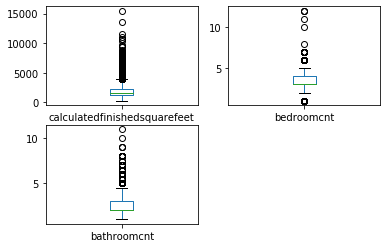

In [40]:
X_train.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

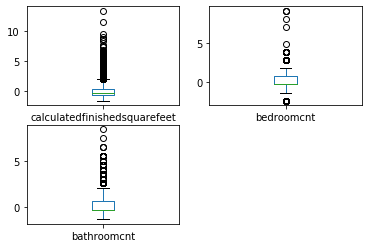

In [43]:
Xtrain_scaled.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

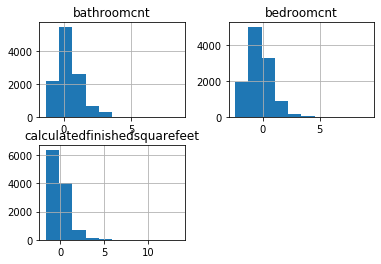

In [44]:
Xtrain_scaled.hist()
plt.show()

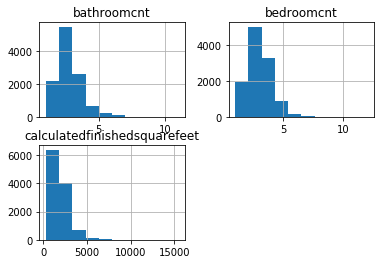

In [45]:
X_train.hist()
plt.show()

In [54]:
X_train.groupby('bathroomcnt')['bathroomcnt'].count()

bathroomcnt
1.0     2002
1.5      177
2.0     4610
2.5      868
3.0     2351
3.5      236
4.0      506
4.5      149
5.0      173
5.5       50
6.0       78
6.5       13
7.0       16
7.5        4
8.0       12
9.0        3
10.0       1
11.0       1
Name: bathroomcnt, dtype: int64

In [75]:
b_room_ct = X_train.groupby('bathroomcnt')['bathroomcnt'].count()

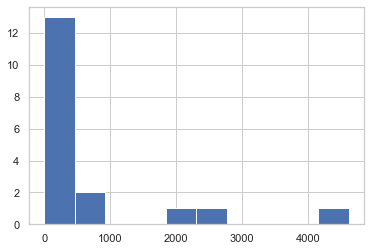

In [76]:
b_room_ct.hist()
plt.show()

In [79]:

bins = [x*.5 for x in range(0,23)]
ax.hist(X_train, bins, orientation='horizontal')
#ax.set_ylim([-5, 5])
plt.show()

In [68]:
# bathroom_count = pd.cut(X_test.bathroomcnt,bins=[0,1,2,3,4,5,6,7,8,9,10])
pd.cut(X_test.bathroomcnt,bins=[0,1,2,3,4,5,6,7,8,9,10])

(array([0.000e+00, 0.000e+00, 2.002e+03, 1.770e+02, 4.610e+03, 8.680e+02,
        2.351e+03, 2.360e+02, 5.060e+02, 1.490e+02, 1.730e+02, 5.000e+01,
        7.800e+01, 1.300e+01, 1.600e+01, 4.000e+00, 1.200e+01, 0.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. ]),
 <a list of 22 Patch objects>)

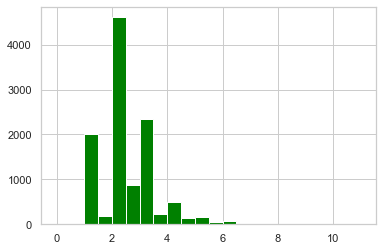

In [74]:
plt.hist(X_train.bathroomcnt, bins = [x*.5 for x in range(0,23)], color = 'green')